In [1]:
%load_ext autoreload
%autoreload 2
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

In [42]:
import numpy as np
import pandas as pd
from pathlib import Path

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
pd.set_option('display.max_columns', 60)

In [4]:
!ls -al ../data

total 13840
drwxr-xr-x   4 root root     4096 Aug  4 01:02 .
drwxr-xr-x   8 root root     4096 Aug  6 12:16 ..
drwxr-xr-x   2 root root     4096 Aug  4 00:55 example_test_audio
-rw-r--r--   1 root root    27018 Jun 18 22:02 example_test_audio_metadata.csv
-rw-r--r--   1 root root     9279 Jun 18 22:02 example_test_audio_summary.csv
-rw-r--r--   1 root root      162 Jun 18 22:02 sample_submission.csv
-rw-r--r--   1 root root      285 Jun 18 22:02 test.csv
-rw-r--r--   1 root root 14023630 Jun 18 22:02 train.csv
drwxr-xr-x 266 root root    20480 Aug  4 01:01 train_audio


In [43]:
data_dir = Path('../data')

In [44]:
audio_dir = data_dir / 'train_audio'

In [52]:
# for bird_dir in audio_dir.iterdir():
#     print(bird_dir.name)
#     print(len(list(bird_dir.glob('*'))))

In [5]:
train_df = pd.read_csv('../data/train.csv')

In [23]:
train_df.head()

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
3     3.5            no     aldfly  2 (stereo)  2013-05-27           both   
4     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species number_of_notes  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher   Not specified   
1        36  XC135454.mp3           both  Alder Flycatcher             1-3   
2        39  XC135455.mp3           both  Alder Flycatcher             1-3   
3        33  XC135456.mp3           both  Alder Flycatcher             1-3   
4        36  XC135457.mp3          level  Alder Flycatcher             1-3   

                                           title  \
0  XC134874 Alder Flycatcher (Empidonax alnorum)   
1  XC135454 Alder Flycatcher (Empidonax alnorum)   
2  XC135455 Alder Flycatcher (Empidonax alnorum)   
3  XC135456 Alder Flycatcher (Empidonax alnorum)   
4  XC135457 Alder Flycatcher (Empidonax alnorum)   

                                    secondary_labels bird_seen  \
0  ['Empidonax minimus_Least Flycatcher', 'Leioth...       yes   
1                                                 []       yes   
2                                                 []       yes   
3  ['Dumetella carolinensis_Gray Catbird', 'Bomby...       yes   
4                                                 []       yes   

            sci_name                                           location  \
0  Empidonax alnorum        Grey Cloud Dunes SNA, Washington, Minnesota   
1  Empidonax alnorum   Carver's Gap Parking area, Roan Mountain Stat...   
2  Empidonax alnorum   Carver's Gap Parking area, Roan Mountain Stat...   
3  Empidonax alnorum   Carver's Gap Parking area, Roan Mountain Stat...   
4  Empidonax alnorum   Carver's Gap Parking area, Roan Mountain Stat...   

  latitude sampling_rate        type elevation  \
0   44.793    48000 (Hz)        call     220 m   
1  36.1065    44100 (Hz)  call, song    1700 m   
2  36.1065    44100 (Hz)  call, song    1700 m   
3  36.1065    44100 (Hz)  call, song    1700 m   
4  36.1065    44100 (Hz)  call, song    1700 m   

                                         description bitrate_of_mp3 file_type  \
0  Two short segments of fairly quiet *pip* calls...   192000 (bps)       mp3   
1  At least three birds seen here moving around s...   128000 (bps)       mp3   
2  At least three birds seen chasing each other a...   128000 (bps)       mp3   
3  img:http://www.flickr.com/photos/madbirder/888...   128000 (bps)       mp3   
4  img:http://www.flickr.com/photos/madbirder/888...   128000 (bps)       mp3   

          volume                                         background   xc_id  \
0  Not specified  American Yellow Warbler (Setophaga aestiva); L...  134874   
1          level                                                NaN  135454   
2          level                                                NaN  135455   
3          level  Grey Catbird (Dumetella carolinensis); Cedar W...  135456   
4          level                                                NaN  135457   

                                 url        country            author  \
0  https://www.xeno-canto.org/134874  United States  Jonathon Jongsma   
1  https://www.xeno-canto.org/135454  United States       Mike Nelson   
2  https://www.xeno-canto.org/135455  United States       Mike Nelson   
3  https://www.xeno-canto.org/135456  United States       Mike Nelson   
4  https://www.xeno-canto.org/135457  United States       Mike Nelson   

                        primary_label longitude         length   time  \
0  Empidonax alnorum_Alder Flycatcher   -92.962  Not specified   8:00   
1  Empidonax alnorum_Alder Flycatcher  -82.1106         0-3(s)

In [7]:
train_df.ebird_code.nunique()

264

In [8]:
train_df.ebird_code.value_counts()

boboli    100
canwar    100
aldfly    100
indbun    100
rocpig    100
         ... 
lecthr     20
coshum     19
hoomer     19
buffle     15
redhea      9
Name: ebird_code, Length: 264, dtype: int64

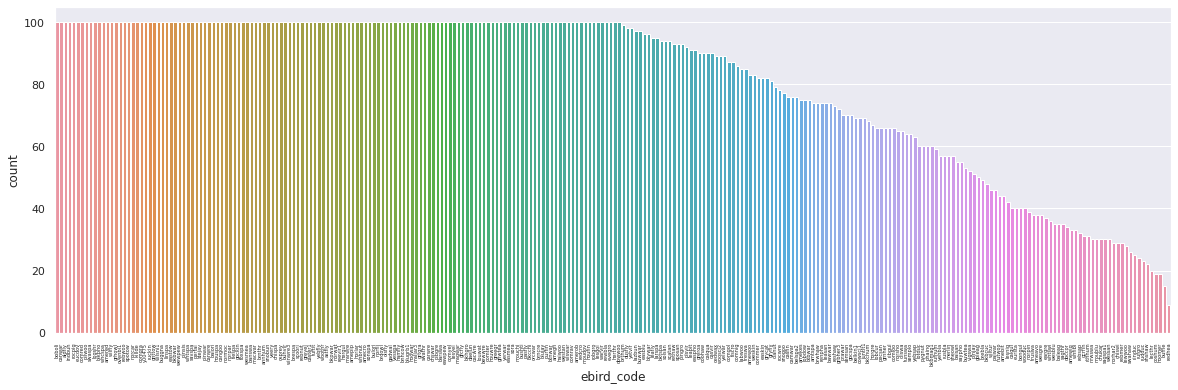

In [41]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='ebird_code', data=train_df, order=train_df.ebird_code.value_counts().index)
ax.tick_params(axis='x', labelrotation=90, labelsize=5)

In [24]:
train_df.sampling_rate.value_counts()

44100 (Hz)    12693
48000 (Hz)     8373
22050 (Hz)      123
32000 (Hz)       93
24000 (Hz)       54
16000 (Hz)       34
11025 (Hz)        3
8000 (Hz)         2
Name: sampling_rate, dtype: int64

In [9]:
len(train_df)

21375

In [10]:
test_df = pd.read_csv('../data/test.csv')

In [11]:
test_df.head()

site                                      row_id  seconds  \
0  site_1   site_1_0a997dff022e3ad9744d4e7bbf923288_5        5   
1  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_10       10   
2  site_1  site_1_0a997dff022e3ad9744d4e7bbf923288_15       15   

                           audio_id  
0  0a997dff022e3ad9744d4e7bbf923288  
1  0a997dff022e3ad9744d4e7bbf923288  
2  0a997dff022e3ad9744d4e7bbf923288

In [12]:
test_summary_df = pd.read_csv('../data/example_test_audio_summary.csv')

In [13]:
test_summary_df

filename_seconds                   birds      filename  \
0      BLKFR-10-CPL_20190611_093000_5    gockin mouchi westan  BLKFR-10-CPL   
1     BLKFR-10-CPL_20190611_093000_10           gockin westan  BLKFR-10-CPL   
2     BLKFR-10-CPL_20190611_093000_15           gockin westan  BLKFR-10-CPL   
3     BLKFR-10-CPL_20190611_093000_20                  mouchi  BLKFR-10-CPL   
4     BLKFR-10-CPL_20190611_093000_25                  mouchi  BLKFR-10-CPL   
..                                ...                     ...           ...   
148  ORANGE-7-CAP_20190606_093000_280         mouqua squirrel  ORANGE-7-CAP   
149  ORANGE-7-CAP_20190606_093000_285  mouqua squirrel westan  ORANGE-7-CAP   
150  ORANGE-7-CAP_20190606_093000_290           mouqua westan  ORANGE-7-CAP   
151  ORANGE-7-CAP_20190606_093000_295         mouqua squirrel  ORANGE-7-CAP   
152  ORANGE-7-CAP_20190606_093000_300         squirrel westan  ORANGE-7-CAP   

     seconds  
0          5  
1         10  
2         15  
3         20  
4         25  
..       ...  
148      280  
149      285  
150      290  
151      295  
152      300  

[153 rows x 4 columns]

In [14]:
test_meta_df = pd.read_csv('../data/example_test_audio_metadata.csv')

In [15]:
test_meta_df

file_id        device      date   hour source  \
0    BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
1    ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   
2    BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
3    BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
4    ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   
..                            ...           ...       ...    ...    ...   
250  ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   
251  ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   
252  ORANGE-7-CAP_20190606_093000  ORANGE-7-CAP  20190606  93000   jack   
253  BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   
254  BLKFR-10-CPL_20190611_093000  BLKFR-10-CPL  20190611  93000   jack   

    ebird_code certainty vox_type  time_start    time_end  channel  
0       westan         c     call    0.255394    0.858845        2  
1     squirrel         c     call    0.415966    1.410334        1  
2       gockin         l     call    0.590725    1.944412        2  
3       mouchi         c     call    1.609081    2.130985        2  
4       brncre         c     song    2.461655    2.746925        1  
..         ...       ...      ...         ...         ...      ...  
250   squirrel         c     call  295.981139  296.559829        2  
251     westan         c     song  296.614276  299.295811        2  
252   squirrel         c     call  299.777789  300.592846        2  
253     yerwar         l     song  458.834619  461.232113        2  
254     yerwar         l     song  465.847696  467.976083        2  

[255 rows x 11 columns]

In [53]:
submision_df = pd.read_csv('../data/sample_submission.csv')

In [54]:
submision_df

row_id   birds
0   site_1_0a997dff022e3ad9744d4e7bbf923288_5  nocall
1  site_1_0a997dff022e3ad9744d4e7bbf923288_10  nocall
2  site_1_0a997dff022e3ad9744d4e7bbf923288_15  nocall

In [16]:
audio_path = '../data/train_audio/aldfly/XC134874.mp3'

In [17]:
ipd.Audio(audio_path)

In [18]:
audio_path = '../data/train_audio/ameavo/XC133080.mp3'
ipd.Audio(audio_path)

In [19]:
audio_path = '../data/train_audio/amebit/XC127371.mp3'
ipd.Audio(audio_path)

In [20]:
audio_path = '../data/train_audio/yetvir/XC120867.mp3'
ipd.Audio(audio_path)

In [21]:
test_audio_path = '../data/example_test_audio/BLKFR-10-CPL_20190611_093000.pt540.mp3'
ipd.Audio(test_audio_path)